In [20]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from persim import PersImage
import gudhi
import os
import glob
from matplotlib import ticker, cm
from matplotlib.colors import LogNorm
from sklearn.cluster import KMeans
import time
from sklearn.decomposition import PCA
import matplotlib as mpl
from sklearn import preprocessing

In [546]:
flist=np.sort(glob.glob("*2d_square*/1.5/*.txt"))

In [210]:
for f in flist:
    data = np.loadtxt(f, dtype=int)
    alpha_complex=gudhi.AlphaComplex(data)
    simplex_tree=alpha_complex.create_simplex_tree()
    PD=simplex_tree.persistence()
    PD0=[]
    PD1=[]
    for elm in PD:
        if elm[0]==1:
            PD1.append((elm[1][0],elm[1][1]-elm[1][0]))
        else:
            if elm[1][1]!=float('inf'):
                PD0.append((elm[1][0],elm[1][1]-elm[1][0]))
    PD0=np.round(PD0,decimals=5)
    PD1=np.round(PD1,decimals=5)
    loc,counts=np.unique(PD0,axis=0,return_counts=True)
    toSave=np.array([[loc[i][0],loc[i][1],counts[i]] for i in np.arange(len(counts))])
    np.savetxt(f[:len(f)-4]+"PD0.dat",toSave)
    loc,counts=np.unique(PD1,axis=0,return_counts=True)
    toSave=np.array([[loc[i][0],loc[i][1],counts[i]] for i in np.arange(len(counts))])
    np.savetxt(f[:len(f)-4]+"PD1.dat",toSave)
    print(f)

Data_2d_squareice_Met_N=50_K=200\1.5\1553028249.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553028307.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553028366.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553028426.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553028485.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553028541.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553028595.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553028649.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553028704.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553028759.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553028815.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553028868.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553028921.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553028974.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553029028.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553029081.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553029135.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553029188.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553029242.txt
Data_2d_squa

Data_2d_squareice_Met_N=50_K=200\1.5\1553038978.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553039042.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553039105.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553039170.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553039260.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553039320.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553039382.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553039452.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553039519.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553039601.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553039674.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553039739.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553039798.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553039856.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553039920.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553039986.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553040049.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553040108.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553040165.txt
Data_2d_squa

Data_2d_squareice_Met_N=50_K=200\1.5\1553058072.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553058176.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553058276.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553058377.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553058481.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553058577.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553058688.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553058793.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553058903.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553059007.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553059096.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553059200.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553059294.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553059398.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553059477.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553059575.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553059679.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553059775.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553059865.txt
Data_2d_squa

Data_2d_squareice_Met_N=50_K=200\1.5\1553078965.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553079062.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553079309.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553079411.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553079514.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553079615.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553079826.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553079909.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553080001.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553080093.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553080197.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553080331.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553080467.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553080596.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553080723.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553080879.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553081023.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553081171.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553081324.txt
Data_2d_squa

Data_2d_squareice_Met_N=50_K=200\1.5\1553098744.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553098856.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553098968.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553099079.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553099186.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553099292.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553099401.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553099507.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553099614.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553099726.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553099837.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553099950.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553100060.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553100169.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553100279.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553100387.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553100491.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553100595.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553100706.txt
Data_2d_squa

Data_2d_squareice_Met_N=50_K=200\1.5\1553117038.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553117149.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553117258.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553117371.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553117480.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553117590.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553117700.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553117809.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553117914.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553118021.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553118129.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553118232.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553118336.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553118444.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553118550.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553118658.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553118766.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553118873.txt
Data_2d_squareice_Met_N=50_K=200\1.5\1553118977.txt
Data_2d_squa

In [2]:
#pdlocnum has format [[birth1, persistence1, counts1],...]
#bounds should be a list [bmin,bmax,pmin,pmax]
#bins should be a list [bbins, pbins]
def PerIm(pdlocnumI,bounds,bins,stdev,res=1000):
    if pdlocnumI % 1000 == 0:
        print(pdlocnumI)
    pdlocnum = pds[pdlocnumI]
    x = np.linspace(bounds[0], bounds[1], res)
    y = np.linspace(bounds[2], bounds[3], res)
    xx, yy = np.meshgrid(x, y, sparse=True)
    z=np.zeros([res,res])
    for i in np.arange(len(pdlocnum)):
        z=z+pdlocnum[i][1]*pdlocnum[i][2]*np.exp((-0.5*(xx-pdlocnum[i][0])**2-0.5*(yy-pdlocnum[i][1])**2)*stdev**-2)
    return z.reshape(bins[0],res//bins[0],bins[1],res//bins[1]).sum(3).sum(1)

In [3]:
fPD1list=np.sort(glob.glob("*2d_square*/*/*PD1.dat"))
TPD1list=[]
for f in fPD1list:
    TPD1list.append(float(f[33:36]))

In [4]:
pds=[np.loadtxt(f) for f in fPD1list]

In [5]:
bounds=[0,5,0,5]
bins=[10,10]
res=bins[0]*10

imgs1=[PerIm(p,bounds,bins,1,res=res) for p in np.arange(len(pds))]

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000


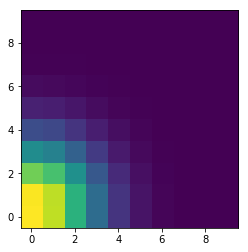

In [6]:
plt.imshow(imgs1[1100],origin='lower')

In [7]:
len(pds)

37439

In [35]:
imgs1_array=np.array([img.flatten() for img in imgs1])

In [86]:
labels=[int(t<1.81) for t in TPD1list]

In [87]:
X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(imgs1_array, labels, TPD1list, test_size=0.5)

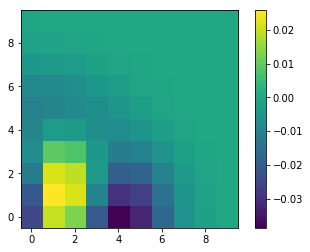

In [88]:
logreg = LogisticRegression(C=0.1, solver='liblinear', penalty='l2')
logreg.fit(X_train, y_train)

inverse_image = np.copy(logreg.coef_).reshape((10,10))
fig, ax = plt.subplots()
cs = ax.imshow(inverse_image, origin='lower')
cbar = fig.colorbar(cs)

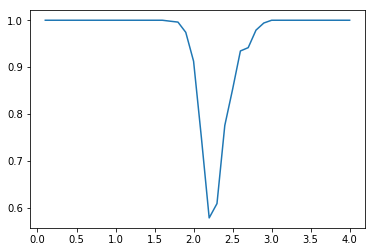

In [51]:
pred = logreg.predict(X_test)
diff = abs(pred-y_test)
TT = np.arange(0.1,4.05,0.1)
TT = np.round(TT, decimals=3)
avg = np.zeros(len(TT))
acc = np.zeros(len(TT))
for i in np.arange(len(TT)):
    avg[i] = np.mean(pred[np.where(T_test==TT[i])[0]])
    acc[i] = np.mean(1-diff[np.where(T_test==TT[i])[0]])

plt.plot(TT, acc)

2.2418837675350702


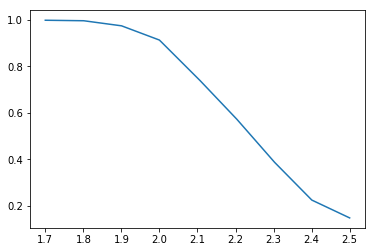

In [52]:
tRange = np.linspace(1.7,2.5,500)
interps = np.interp(tRange, TT, avg)

Tc = tRange[abs(interps-0.5).argmin()]

print(Tc)
plt.plot(tRange, interps)

**Power Law from PI**

In [15]:
def func(logr, a, xi, c):
    return c - np.exp(logr) / xi - a * logr

In [18]:
def getDensParams(im):
    dens=np.zeros(10)
    for i in range(len(dens)):
        for j in range(i+1):
            dens[i] += im[j][i-j]
    ydata=np.log(dens)
    rdata=np.log(np.arange(len(dens))+1)
    return curve_fit(func, rdata, ydata)[0]

C:\Users\gerg1\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


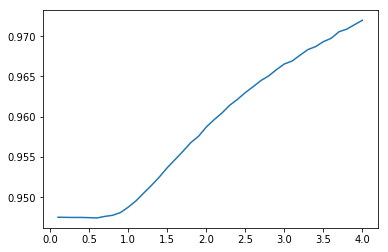

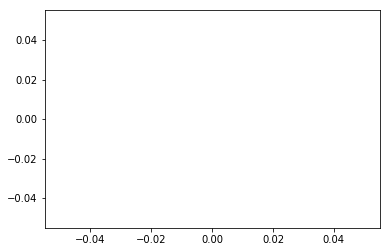

In [90]:
rng=np.arange(0,len(imgs1),1)
params=np.array([getDensParams(imgs1[i]) for i in rng])
temps=[TPD1list[i] for i in rng]

# plt.scatter(temps,params[:,1],marker='.',s=5)
# plt.show()
# plt.scatter(temps,params[:,2],marker='.',s=5)
# plt.show()

ts=np.unique(temps)[1:]
aveXi=np.zeros(len(ts))
ave_a=np.zeros(len(ts))
for i in np.arange(len(ts)):
    aveXi[i] = np.exp(np.mean(np.log(params[np.where(temps==ts[i])[0]][:,1])))
    ave_a[i] = np.exp(np.mean(np.log(params[np.where(temps==ts[i])[0]][:,0])))
plt.plot(ts,aveXi)
plt.show()
plt.plot(ts,ave_a)
plt.show()

**PCA**

In [588]:
pca = PCA(n_components=2)
X_r = pca.fit(imgs1_array).transform(imgs1_array)

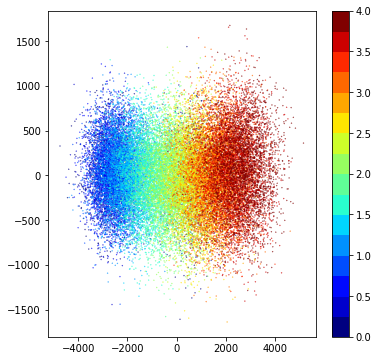

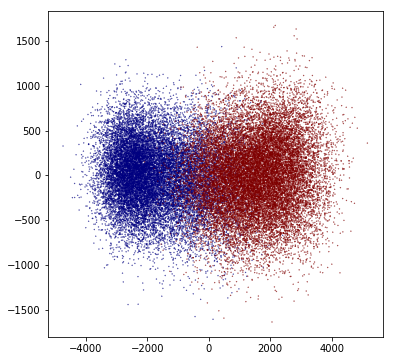

In [589]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,4,17)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
scat = ax.scatter([elm[0] for elm in X_r],[elm[1] for elm in X_r],c=TPD1list,s=0.1,cmap=cmap, norm=norm)
cbar = fig.colorbar(scat)
plt.show()

fig, ax = plt.subplots(1,1, figsize=(6,6))
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,1,3)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
scat = ax.scatter([elm[0] for elm in X_r],[elm[1] for elm in X_r],c=[1-l for l in labels],s=0.1,cmap=cmap, norm=norm)
plt.show()

In [590]:
X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(imgs1_array, labels, TPD1list, test_size=0.5)

In [591]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)

2.007615230460922


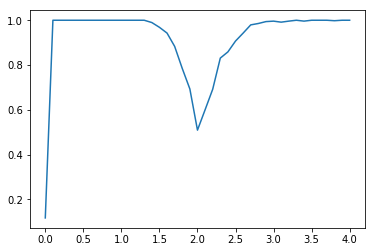

In [593]:
pred = kmeans.predict(X_test)
diff = abs(pred - y_test)
TT = np.unique(T_test)
TT = np.round(TT, decimals=3)
avg = np.zeros(len(TT))
acc = np.zeros(len(TT))
for i in np.arange(len(TT)):
    avg[i] = np.mean(pred[np.where(T_test==TT[i])[0]])
    acc[i] = np.mean(1-diff[np.where(T_test==TT[i])[0]])

plt.plot(TT, acc)

tRange = np.linspace(1.6,2.5,500)
interp = np.interp(tRange, TT, avg)

Tc = tRange[abs(interp-0.5).argmin()]
print(Tc)